#### Load & Run Population Analysis Script
This line of code imports the population_analysis.py script, loads the dataset, and processes the data to generate:
1. regional_stats: Region-level statistics (standard error, cosine similarity).
2. country_stats: Country-level statistics (population, net change, density, etc.).

In [1]:
import population_analysis

file_path = 'data/countries.csv'
regional_stats, country_stats = population_analysis.main(file_path)

#### Convert Statistics to a Pandas DataFrame


In [5]:
import pandas as pd

df_regions = pd.DataFrame.from_dict(regional_stats, orient='index', columns=['Standard Error', 'Cosine Similarity'])
df_regions


,Standard Error,Cosine Similarity
oceania,2.553664e+06,0.951424
asia,8.124764e+07,0.748730
latin america & caribbean,2.244142e+07,0.944560
europe,1.253500e+07,0.738266
africa,1.653059e+07,0.802280
northern america,8.008958e+07,0.784107


In [ ]:
# Convert Country-Level Data for a Specific Region
df_northern_america = pd.DataFrame.from_dict(country_stats["northern america"], orient="index",
                                      columns=["Population", "Net Change", "% of Region", "Density", "Rank"])

df_northern_america

,Population,Net Change,% of Region,Density,Rank
united states,331002651,1937734,89.7357,36.1854,1
canada,37742154,331107,10.2320,4.1504,2
bermuda,62278,-228,0.0169,1245.5600,3
greenland,56770,98,0.0154,0.1383,4


#### Creating dataframes for each region
Instead of creating DataFrames one by one, loop through all regions to create and store DataFrames for each region from `country_stats`. This makes it **easier to analyze, display, and work with country-specific population data** dynamically.


In [4]:
# Create empty dictionary
region_dataframes = {}

# Loop through all regions in country_stats
for region in country_stats.keys():
    # Create a DataFrame for each region
    df_region = pd.DataFrame.from_dict(country_stats[region], orient="index",
                                       columns=["Population", "Net Change", "% of Region", "Density", "Rank"])
    
    # Store it in the dictionary using the region name as the key
    region_dataframes[region] = df_region

    print(f"Region: {region}")
    display(df_region)


Region: oceania


,Population,Net Change,% of Region,Density,Rank
australia,25499884,296686,62.2796,3.3193,1
papua new guinea,8947024,170915,21.8517,19.7567,2
new zealand,4822233,39170,11.7776,18.3139,3
fiji,896445,6492,2.1894,49.0665,4
new caledonia,285498,2748,0.6973,15.6181,5
french polynesia,280908,1621,0.6861,76.7508,6
samoa,198414,1317,0.4846,70.1110,7
nauru,10824,68,0.0264,541.2000,8
niue,1626,11,0.0040,6.2538,9
tokelau,1357,17,0.0033,135.7000,10


Region: asia


,Population,Net Change,% of Region,Density,Rank
india,1380004385,13586631,77.7153,464.1494,1
indonesia,273523615,2898047,15.4035,150.9871,2
sri lanka,21413249,89516,1.2059,341.4647,3
kazakhstan,18776707,225280,1.0574,6.9551,4
syria,17500658,430523,0.9856,95.3039,5
cambodia,16718965,232423,0.9415,94.7143,6
united arab emirates,9890402,119873,0.5570,118.3062,7
tajikistan,9537645,216627,0.5371,68.1455,8
israel,8655535,136158,0.4874,399.9785,9
hong kong,7496981,60827,0.4222,7139.9819,10


Region: latin america & caribbean


,Population,Net Change,% of Region,Density,Rank
brazil,212559417,1509890,45.1146,25.4314,1
mexico,128932753,1357224,27.3653,66.3251,2
colombia,50882891,543448,10.7996,45.8611,3
argentina,45195774,415097,9.5926,16.5148,4
peru,32971854,461401,6.9981,25.7593,5
french guiana,298682,7850,0.0634,3.6336,6
aruba,106766,452,0.0227,593.1444,7
u.s. virgin islands,104425,-153,0.0222,298.3571,8
antigua and barbuda,97929,811,0.0208,222.5659,9
falkland islands,3480,103,0.0007,0.2859,10


Region: europe


,Population,Net Change,% of Region,Density,Rank
russia,145934462,62206,29.6670,8.9110,1
germany,83783942,266897,17.0324,240.3716,2
united kingdom,67886011,355839,13.8005,280.6019,3
france,65273511,143783,13.2695,119.2086,4
italy,60461826,-88249,12.2913,205.5546,5
spain,46754778,18002,9.5048,93.7345,6
norway,5421241,42384,1.1021,14.8418,7
ireland,4937786,55291,1.0038,71.6764,8
croatia,4105267,-25037,0.8346,73.3607,9
moldova,4033963,-9300,0.8201,122.7995,10


Region: africa


,Population,Net Change,% of Region,Density,Rank
nigeria,206139589,5175990,39.4792,226.3355,1
ethiopia,114963588,2884858,22.0175,114.9636,2
egypt,102334404,1946331,19.5988,102.8022,3
angola,32866272,1040977,6.2944,26.3626,4
ghana,31072940,655084,5.9510,136.5603,6
mozambique,31255435,889399,5.9859,39.7460,5
rèunion,895312,6385,0.1715,358.1248,7
comoros,869601,18715,0.1665,467.2762,8
western sahara,597339,14876,0.1144,2.2456,9
cabo verde,555987,6052,0.1065,137.9620,10


Region: northern america


,Population,Net Change,% of Region,Density,Rank
united states,331002651,1937734,89.7357,36.1854,1
canada,37742154,331107,10.2320,4.1504,2
bermuda,62278,-228,0.0169,1245.5600,3
greenland,56770,98,0.0154,0.1383,4


#### Using ipywidgets to add interactivity

In [9]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown widget for selecting a region
region_dropdown = widgets.Dropdown(
    options=list(country_stats.keys()),
    description="Select Region",
    style={'description_width': 'initial'}
)

# Function to update DataFrame based on selected region
def display_region_data(region):
    df_selected = pd.DataFrame.from_dict(country_stats[region], orient="index",
                                         columns=["Population", "Net Change", "% of Region", "Density", "Rank"])
    display(df_selected)

widgets.interactive(display_region_data, region=region_dropdown)


interactive(children=(Dropdown(description='Select Region', options=('oceania', 'asia', 'latin america & carib…

#### **Population Distribution by Region**
Visualizes how much population variation exists in different regions.

##### **Analysis**
1. **Asia and Northern America have extremely high standard errors**  
This means that some countries have very large populations while others have significantly smaller ones.
2. **Lower standard errors in other regions**    
Regions like Europe and South America have a more even distribution of population across countries.

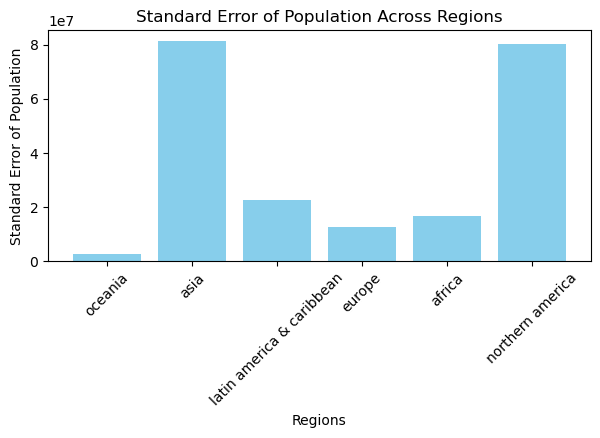

In [ ]:
import matplotlib.pyplot as plt

# Extract total population for each region
region_names = list(regional_stats.keys())
# Loops through each region in regional_stats and extracts the first value [0]
std_errors = [regional_stats[region][0] for region in region_names] 

plt.figure(figsize=(7, 3))
plt.bar(region_names, std_errors, color='skyblue')
plt.xlabel("Regions")
plt.ylabel("Standard Error of Population")
plt.title("Standard Error of Population Across Regions")
plt.xticks(rotation=45)
plt.show()

#### **Population and Density Heatmap - Asia**
Visualizes the total population and population density for various countries in Asia.  

##### **Analysis**
1. **India has the highest population but moderate density**  
   - With 1.38 billion people, India dominates in terms of total population.  
   - However, its density (464 people/km²) is lower than smaller, crowded regions.

2. **Macau has one of the highest population densities**  
   - While Macau’s population is small, its density is extremely high.  
   - This means people live in a very compact space compared to larger countries like India or Indonesia.  


The heatmap shows that population size alone doesn't determine how crowded a country is. Smaller nations can have extremely high densities, whereas large countries may have more evenly distributed populations.


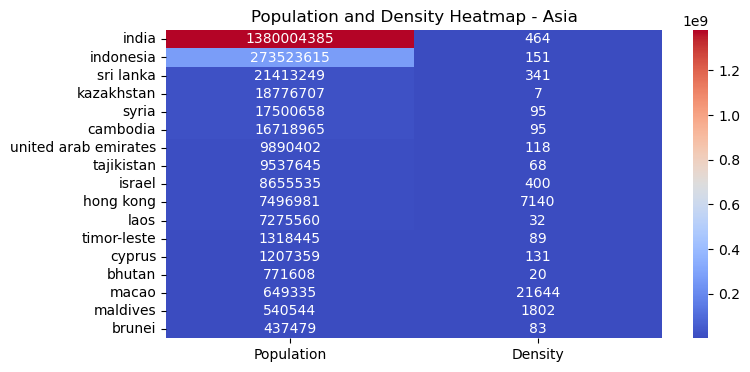

In [14]:
import seaborn as sns

region = "asia"

# Convert country data into a DataFrame
df_heatmap = pd.DataFrame.from_dict(country_stats[region], orient="index",
                                    columns=["Population", "Net Change", "% of Region", "Density", "Rank"])

plt.figure(figsize=(8, 4))
sns.heatmap(df_heatmap[["Population", "Density"]], annot=True, fmt=".0f", cmap="coolwarm")
plt.title(f"Population and Density Heatmap - {region.capitalize()}")
plt.show()

In [17]:
df_regions


,Standard Error,Cosine Similarity
oceania,2.553664e+06,0.951424
asia,8.124764e+07,0.748730
latin america & caribbean,2.244142e+07,0.944560
europe,1.253500e+07,0.738266
africa,1.653059e+07,0.802280
northern america,8.008958e+07,0.784107


**#### Cosine Similarity across regions**  
Cosine similarity helps us understand how population size relates to land area across different regions. A higher value (closer to 1) means that bigger countries tend to have bigger populations, while a lower value suggests there's no strong connection between size and population.

#### **Analyis**
In Oceania (0.95), countries with more land generally have more people, while in Europe (0.74), some small countries are packed with people, making the relationship weaker.

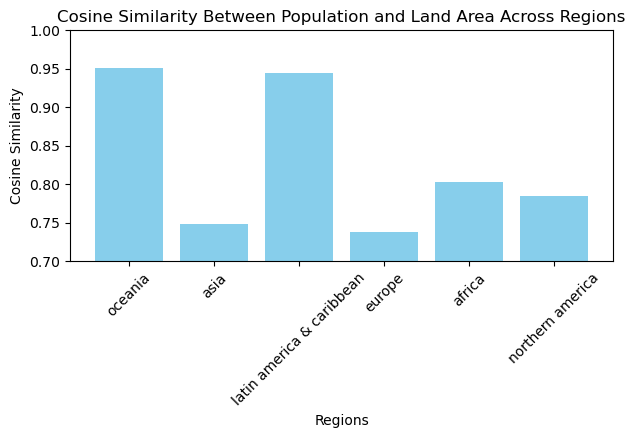

In [ ]:
import matplotlib.pyplot as plt

regions = df_regions.index
cosine_similarity = df_regions["Cosine Similarity"]

plt.figure(figsize=(7, 3))
plt.bar(regions, cosine_similarity, color="skyblue")

plt.xlabel("Regions")
plt.ylabel("Cosine Similarity")
plt.title("Cosine Similarity Between Population and Land Area Across Regions")
plt.ylim(0.7, 1) 
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()
